In [1]:
import seaborn as sns

# Sinusoidal Positional Encoding

## Concept
- **Sinusoidal Positional Encoding** is used in Transformer models to give the model information about the position of tokens in a sequence.
- Each dimension (`d_emb`) of the positional encoding corresponds to a sine or cosine function with a different wavelength.
- This allows the model to capture the order and structure within the sequence, which is crucial for tasks like language understanding and translation.

## Periodicity
- If we consider `emb(10)` to have a periodicity of 4, it means that this encoding dimension will have a repeating pattern every 4 positions.
- Positions such as `pos1`, `pos5`, `pos9`, etc., will have similar values in `emb(10)`, capturing features that occur at regular intervals.

## Utility
- The Transformer can leverage these periodic patterns to detect any inherent periodicity in sequences.
- For example, if there is a syntactic or semantic pattern that repeats every 4 words in a sentence, `emb(10)` could help the model to recognize and encode this pattern.

## Conclusion
- The sinusoidal pattern allows the model to infer relative positions and understand repeated structures within the sequence.
- This is one of the reasons why Transformer models are effective at handling tasks that require an understanding of the sequence order and patterns.
"""


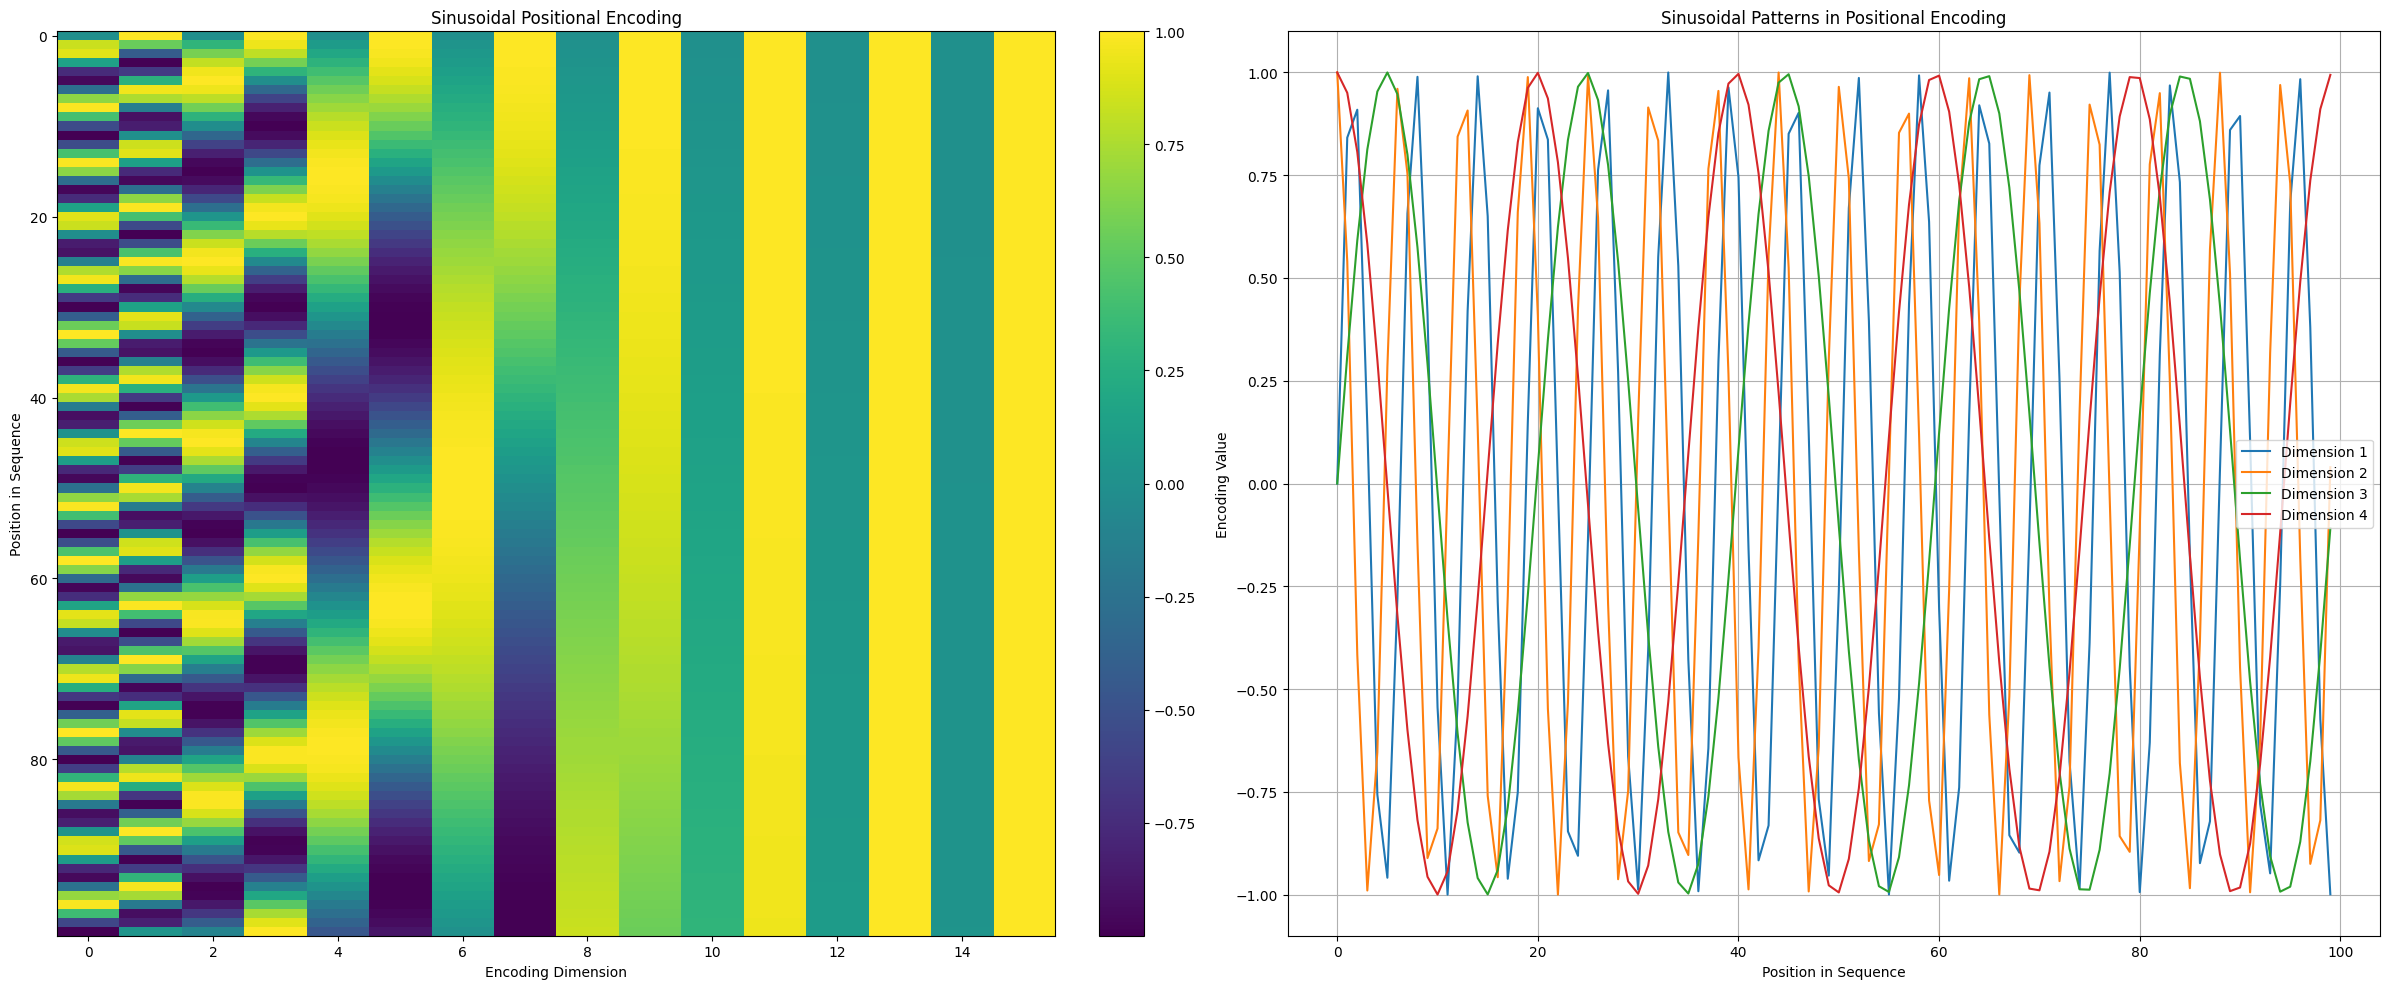

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate sinusoidal positional encodings
def get_sinusoidal_encoding(max_seq_len, d_model):
    """
    Args:
    max_seq_len: the maximum length of the input sequences
    d_model: the dimension of the encodings/hidden states

    Returns:
    A numpy array of shape (max_seq_len, d_model) containing the positional encodings
    """
    # Create a 2D array with positions along rows and dimensions along columns
    position = np.arange(max_seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    # Assign the sinusoidal values
    encoding = np.zeros((max_seq_len, d_model))
    encoding[:, 0::2] = np.sin(position * div_term)
    encoding[:, 1::2] = np.cos(position * div_term)
    return encoding

# Parameters
max_seq_len = 100  # Maximum sequence length
d_model = 16       # Dimensions of the encoding

# Calculate the positional encodings
encodings = get_sinusoidal_encoding(max_seq_len, d_model)

# Set up a grid for the plots
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

# Plot the heatmap of sinusoidal encodings on the left side
img = axs[0].imshow(encodings, cmap='viridis', aspect='auto')
fig.colorbar(img, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Sinusoidal Positional Encoding')
axs[0].set_xlabel('Encoding Dimension')
axs[0].set_ylabel('Position in Sequence')

# Plot the first few dimensions of the encoding on the right side
for dim in range(min(4, d_model)):  # Plot the first 4 dimensions
    axs[1].plot(encodings[:, dim], label=f'Dimension {dim+1}')

axs[1].set_title('Sinusoidal Patterns in Positional Encoding')
axs[1].set_xlabel('Position in Sequence')
axs[1].set_ylabel('Encoding Value')
axs[1].legend()
axs[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


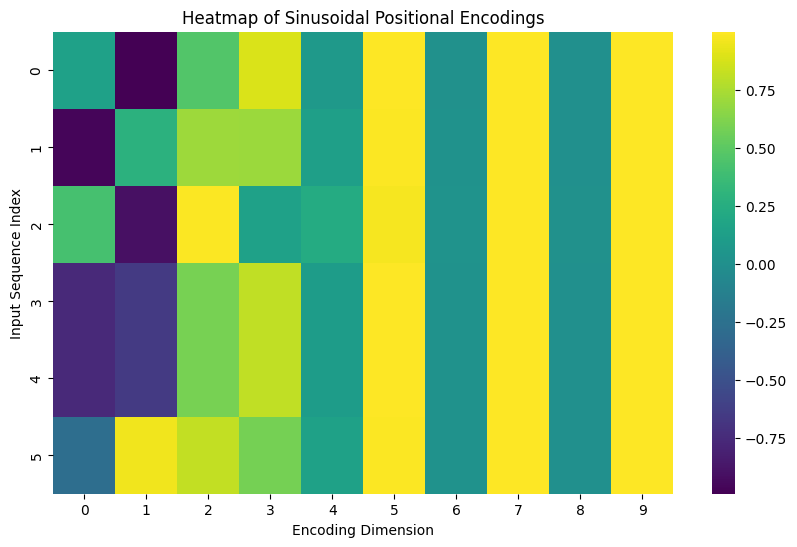

In [3]:
import seaborn as sns

# Define the input sequence of positions
input_sequence = [3, 5, 9, 4, 4, 6]

# Define the dimensionality of the embeddings
d_emb = 10

# Generate the positional encodings for the maximum position in the input sequence
max_position = max(input_sequence)  # We need to generate encodings at least up to the maximum position
positional_encodings = get_sinusoidal_encoding(max_position + 1, d_emb)  # +1 because positions are 0-indexed

# Retrieve the relevant encodings for the input sequence
sequence_encodings = np.array([positional_encodings[pos] for pos in input_sequence])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sequence_encodings, cmap='viridis', annot=False)
plt.title('Heatmap of Sinusoidal Positional Encodings')
plt.xlabel('Encoding Dimension')
plt.ylabel('Input Sequence Index')
plt.show()


The heatmap above displays the sinusoidal positional encodings assigned to the input tensor with the sequence [3, 5, 9, 4, 4, 6]. Each row in the heatmap corresponds to the positional encoding for one element of the input sequence, and each column represents one dimension of the encoding.

This visualization clearly shows that even though the input data is sequential, sinusoidal positional encodings can provide unique position information for each element, which is independent of the sequential order. This is useful for models like Transformers, where understanding the position of each element within the sequence is important for tasks such as language translation or text generation

[[3, 5, 9, 4, 4, 6], [2, 2, 3, 6, 8, 9], [0, 7, 5, 3, 2, 2]]


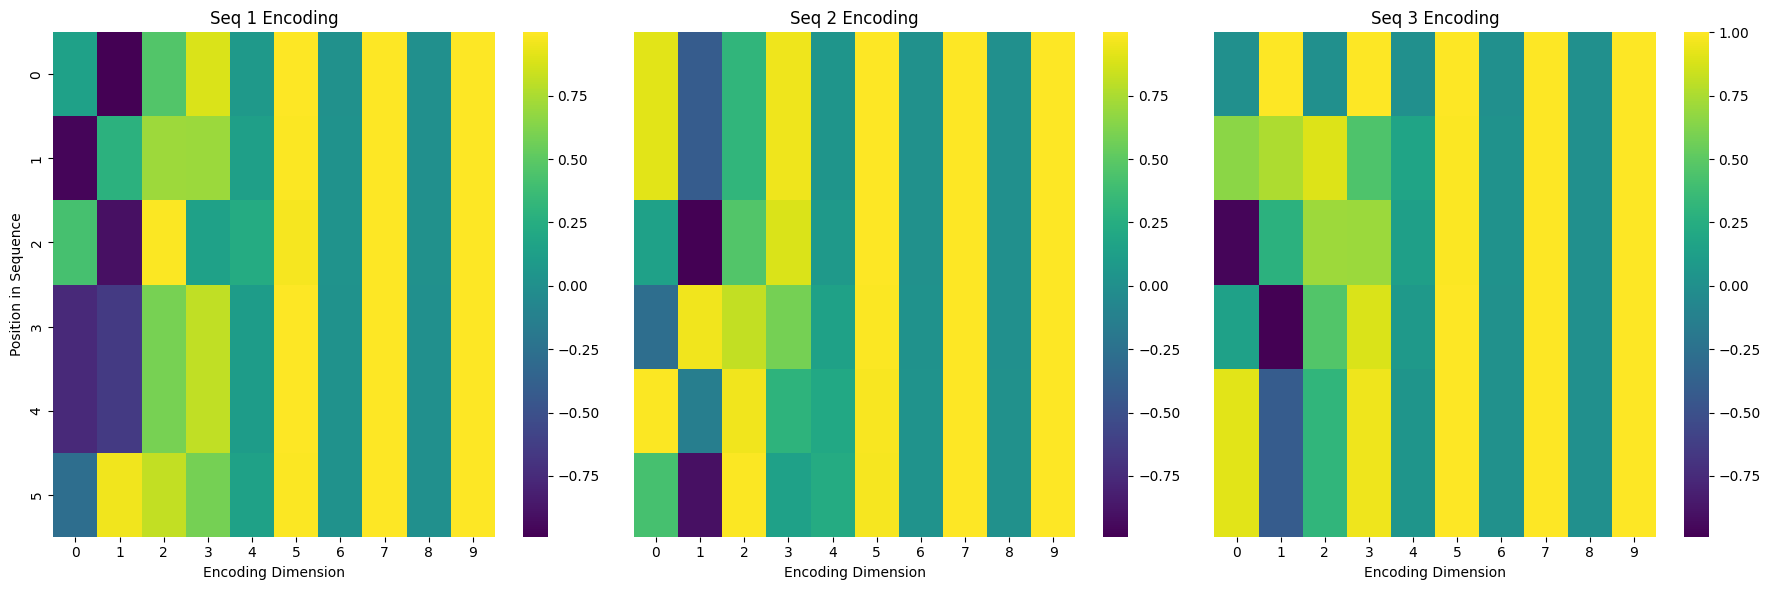

In [4]:
# Let's define a function that takes a batch of sequences (n_batch, n_seq) 
# and applies sinusoidal positional encoding to each sequence.
# The result will be a tensor of shape (n_batch, n_seq, d_emb).

def encode_batch_sequences(batch_sequences, d_emb):
    """
    Apply sinusoidal positional encoding to a batch of sequences.

    Args:
    batch_sequences: A list of lists, where each inner list is a sequence of positions.
    d_emb: The dimensionality of the embeddings.

    Returns:
    A 3D numpy array of shape (n_batch, n_seq, d_emb) containing the positional encodings for the batch.
    """
    max_position = max(max(seq) for seq in batch_sequences)  # Find the max position in the batch for encoding
    positional_encodings = get_sinusoidal_encoding(max_position + 1, d_emb)  # Generate the encodings

    # Initialize an empty list to store the batch encodings
    batch_encodings = []

    # Apply the positional encodings to each sequence in the batch
    for sequence in batch_sequences:
        # Retrieve the relevant encodings for the current sequence
        sequence_encodings = np.array([positional_encodings[pos] for pos in sequence])
        batch_encodings.append(sequence_encodings)

    # Convert the list to a 3D numpy array
    batch_encodings_array = np.array(batch_encodings)
    
    return batch_encodings_array

# Using the already defined function 'encode_batch_sequences' and 'd_emb' value
# Re-define the batch of sequences with the new sequences provided
batch_sequences = [
    [3, 5, 9, 4, 4, 6],
    [2, 2, 3, 6, 8, 9],
    [0, 7, 5, 3, 2, 2],
    # ... more sequences can be added
]

print(batch_sequences)

# Encode the batch sequences using the predefined function
encoded_batch = encode_batch_sequences(batch_sequences, d_emb)

# Set up a horizontal grid for the heatmaps
n_sequences = len(encoded_batch)
fig, axs = plt.subplots(1, n_sequences, figsize=(18, 6))

# Plot each sequence's heatmap in a grid
for i, ax in enumerate(axs.flat):
    sns.heatmap(encoded_batch[i,:,:], cmap='viridis', annot=False, ax=ax)
    ax.set_title(f'Seq {i+1} Encoding')
    ax.set_xlabel('Encoding Dimension')
    if i == 0:  # Only set ylabel for the first subplot to avoid repetition
        ax.set_ylabel('Position in Sequence')
    else:
        ax.set_yticks([])  # Remove y-axis labels for other subplots

plt.tight_layout()
plt.show()

The heatmaps have been generated for each sequence in the batch after applying the sinusoidal positional encoding:

- Each heatmap corresponds to one sequence from the batch.
- The y-axis represents the position within the sequence.
- The x-axis represents the encoding dimensions (from 0 to 9 for `d_emb` of 10).

From these heatmaps, we can observe that the encoding has been applied appropriately. Even though some sequences contain the same position numbers, their encodings might appear at different rows across the heatmaps because the position numbers are assigned according to their order in each specific sequence. This ensures that each position in the sequence receives a unique encoding, demonstrating the flexibility and effectiveness of sinusoidal positional encodings in capturing the order information within sequences.

Lets verify that the `ArbitraryPositionalEncoder` module from the `PositionalEncoders.py` file works correctly.

This code is expected to:
- Confirm that the input and output tensor sizes are as expected.
- Visualize the positional encodings to ensure they match the anticipated patterns.

Input batch shape: torch.Size([3, 6])
Encoded batch shape: torch.Size([3, 6, 10])


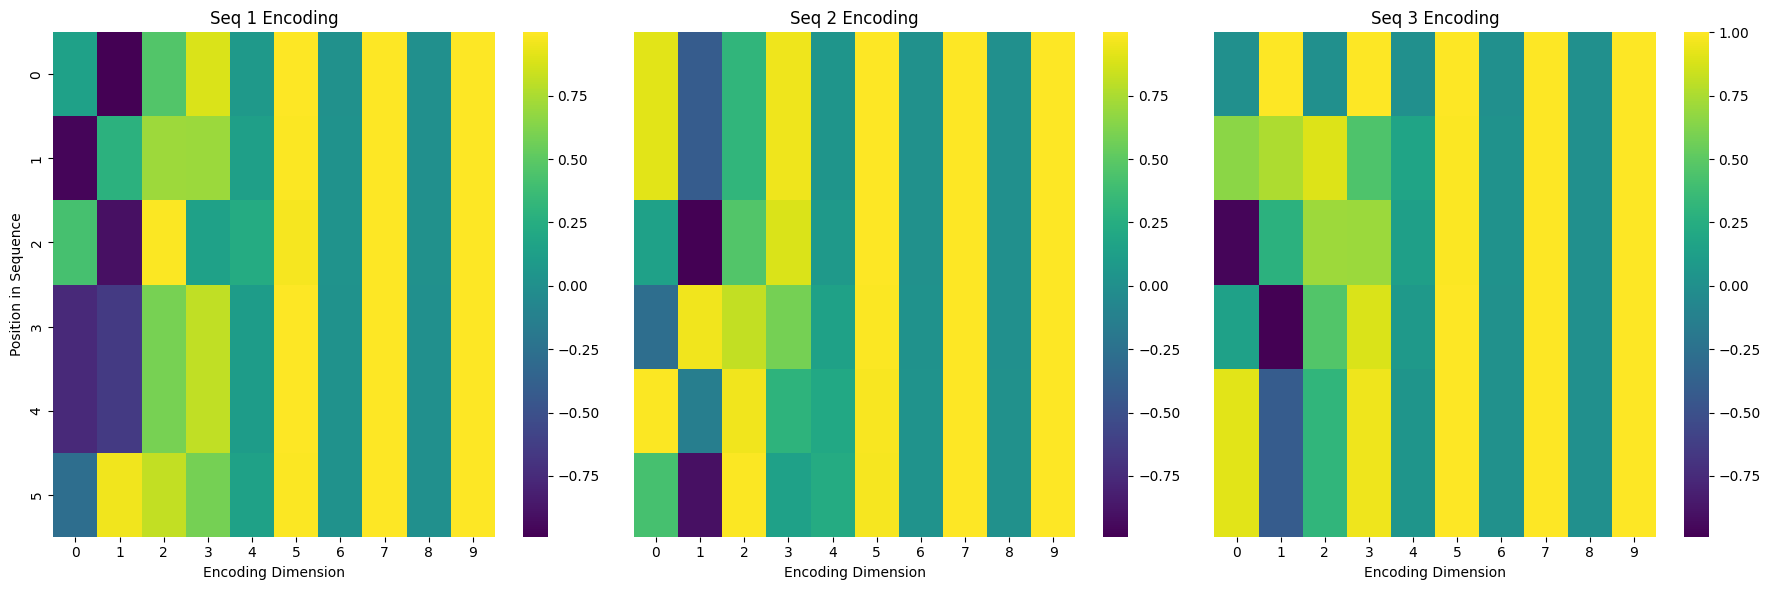

In [5]:
from PositionalEncoders import ArbitraryPositionalEncoder
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Example usage
max_pos_len = 100  # Define the maximum length for the input sequences
d_emb = 10         # Define the dimensionality of the embeddings
encoder = ArbitraryPositionalEncoder(max_pos_len, d_emb)

# Define a batch of sequences as a PyTorch tensor
batch_sequences = torch.tensor([
    [3, 5, 9, 4, 4, 6],
    [2, 2, 3, 6, 8, 9],
    [0, 7, 5, 3, 2, 2],
    # ... more sequences
])

# Apply the encoder
encoded_batch = encoder.forward(batch_sequences)

# Check the shape of the encoded batch
encoded_batch_shape = encoded_batch.shape

# Print the shapes to document the input and output tensor sizes
print(f"Input batch shape: {batch_sequences.shape}")
print(f"Encoded batch shape: {encoded_batch_shape}")

# Set up a horizontal grid for the heatmaps
n_sequences = len(encoded_batch)
fig, axs = plt.subplots(1, n_sequences, figsize=(18, 6))

# Plot each sequence's heatmap in a grid
for i, ax in enumerate(axs.flat):
    sns.heatmap(encoded_batch[i,:,:].detach().numpy(), cmap='viridis', annot=False, ax=ax)
    ax.set_title(f'Seq {i+1} Encoding')
    ax.set_xlabel('Encoding Dimension')
    if i == 0:  # Only set ylabel for the first subplot to avoid repetition
        ax.set_ylabel('Position in Sequence')
    else:
        ax.set_yticks([])  # Remove y-axis labels for other subplots

plt.tight_layout()
plt.show()
